In [ ]:
!pip install coolprop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 21.3 MB/s eta 0:00:00


In [ ]:
from CoolProp.CoolProp import PropsSI

Considere um sistema de refrigeração por compressão de vapor com dois evaporadores, operando com R-12 (Freon 12). O evaporador de baixa temperatura opera a –18 °C com vapor saturado em sua saída e com uma capacidade de refrigeração de 3 TR (TR = Tonelada de Refrigeração; 1 TR = 3,517 kW). O evaporador de temperatura mais alta gera vapor saturado a 3,2 bar em sua saída e tem capacidade de refrigeração de 2 TR. A compressão é isentrópica, sendo a pressão de descarga do compressor de 10 bar. Desprezando a perda de carga nas linhas de refrigerante e sabendo que o refrigerante deixa o condensador como líquido saturado a 10 bar, determine

In [ ]:
fluido2 = 'R12'

#evaporador 1 -  saida vapor sat.
T2_6 = -18 + 273.15
x2_6 = 1
Q2_ev1 = 2 * 3.517 *1000 #W

#evaporador 2 -  saida vapor sat.
P2_7 = 3.2 * 100000
x2_7 = 1
Q2_ev2 = 3 * 3.517 * 1000 #W

# Saida do compressor
P2_2 = 10 * 100000

# saido do condensador como liq. Sat.

x2_3 = 0

### Propriedades termodinâmica

In [ ]:
# ponto 6

h2_6 = PropsSI('H', 'T', T2_6, 'Q', x2_6, fluido2)
print("h6 = ", h2_6/1000, "kJ/kg")

s2_6 = PropsSI('S', 'T', T2_6, 'Q', x2_6, fluido2)
print("s6 = ", s2_6/1000, "kJ/kgK")


#ponto 7

h2_7 = PropsSI('H', 'P', P2_7, 'Q', x2_7, fluido2)
print("h7 = ", h2_7/1000, "kJ/kg")

s2_7 = PropsSI('S', 'P', P2_7, 'Q', x2_7, fluido2)
print("s7 = ", s2_7/1000, "kJ/kgK")


# ponto 3
h2_3 = PropsSI('H', 'P', P2_2, 'Q', x2_3, fluido2)
print("h3 = ", h2_3/1000, "kJ/kg")



h6 =  344.587468350568 kJ/kg
s6 =  1.5692633508232865 kJ/kgK
h7 =  353.3187395612948 kJ/kg
s7 =  1.5589150193256416 kJ/kgK
h3 =  241.00157723859135 kJ/kg


## Solução:

Inicialmente precisamos determinar a vazão mássica de fluido refrigerante no evaporador 1 e 2. sabendo que $ \dot{Q}_{ev1} = \dot{m}_7 (h_7 - h_4)$, $ \dot{Q}_{ev2} = \dot{m}_6 (h_6 - h_5) $ , $h_4 = h_3$ (processo isoentálpica) e $h_5 = h_4 $, podemos encontrar as vazões mássicas respectivamente:

$$ \dot{m}_7 = \frac{\dot{Q}_{ev1}}{(h_7 - h_4)} $$

e

$$ \dot{m}_6 = \frac{\dot{Q}_{ev2}}{(h_6 - h_5)}$$

In [ ]:
h2_4 = h2_3
h2_5 = h2_3

m2_7 = Q2_ev1 / (h2_7 - h2_4)
print("m7 = ", m2_7, "kg/s")
m2_6 = Q2_ev2 / (h2_6 - h2_5)
print("m6 = ", m2_6, "kg/s")

m7 =  0.06262622607745644 kg/s
m6 =  0.10185750092736415 kg/s



#### No ponto 8

Sabemos que a válvula de expansão é um processo isoentálpico, ou seja, entalpia constante $h_8 = h_7$. E ainda sabemos que $\dot{m}_8 = \dot{m}_7$

#### No ponto 1

Devemos realizar um balanço de massa e energia na junção entre o ponto 8 e ponto 6. O balanço de massa temos:

$$ \dot{m}_8 + \dot{m}_6 =  \dot{m}_1  $$

O balanço de energia temos:
$$ \dot{m}_8 h_8 + \dot{m}_6 h_6 = \dot{m}_1 h_1 $$

Assim, determinamos a entalpia do ponto 1:

$$ h_1 = \frac{\dot{m}_8 h_8 + \dot{m}_6 h_6}{ \dot{m}_8 + \dot{m}_6 } $$

com estas ionformações podemos determinar a entropia do ponto 1, sabendo $h_1$ e $P_6$, e interpolando na tabela termodinâmica.



In [ ]:
m2_8 = m2_7
h2_8 = h2_7

h2_1 = (m2_8 * h2_8 + m2_6 * h2_6) / (m2_8 + m2_6)
print("h1 = ", h2_1/1000, "kJ/kg")
#determinando a pressão no ponto 6
P2_6 = PropsSI('P', 'T', T2_6, 'Q', x2_6, fluido2)
print("P6 = ", P2_6/1000, "kPa")
#determinando a entropia do ponto 1 com as propriedades P6 e h1

s2_1 = PropsSI('S', 'P', P2_6, 'H', h2_1, fluido2)
print("s1 = ", s2_1/1000, "kJ/kgK")


h1 =  347.91184927714164 kJ/kg
P6 =  162.79181611133777 kPa
s1 =  1.5821508393493562 kJ/kgK


Considerando um processo de compressão isoentrópico, $s_2 = s_1$, podemos determinar a entalpia do ponto 2 por meio de interpolação na tabela termodinâmica utilizando as propriedades $P_2$  e $s_2$.

In [ ]:
h2_2 = PropsSI('H', 'P', P2_2, 'S', s2_1, fluido2)
print("h2 = ", h2_2/1000, "kJ/kg")


h2 =  381.20826016082185 kJ/kg


#### <font color='purple'> Solução: Determinando a taxa de compressão: </font>

A potência consumida pode ser determinado por:
$$ \dot{W}_c =  \dot{m}_1 (h_2 - h_1)$$


In [ ]:
w2_c = (m2_8 + m2_6) * (h2_2 - h2_1)
print("Wc = ", w2_c/1000, "kW")

Wc =  5.476717758031594 kW


#### <font color='purple'> Determinando a quantidade de calor rejeitado no condensador </font>

O calor rejeitado no condensador pode ser determinado por:

$$ \dot{Q}_{cd} = \dot{m}_1 (h_3 - h_2) $$



In [ ]:
q2_cd = (m2_8 + m2_6) * (h2_3 - h2_2)
print("Q_cd = ", q2_cd/1000, "kW")

Q_cd =  -23.061717758031598 kW


#### <font color='purple'> Solução b, determinando o coeficiente de performance </font>

A COP pode ser determinado por:
$$COP = \frac{\dot{Q}_{ev1} + \dot{Q}_{ev2}}{\dot{W}_c} $$

In [ ]:
COP2 = (Q2_ev1 + Q2_ev2)/w2_c
print("COP = ", COP2)

COP =  3.210864750919771


#### <font color='red'> Solução diagrama T x S </font>
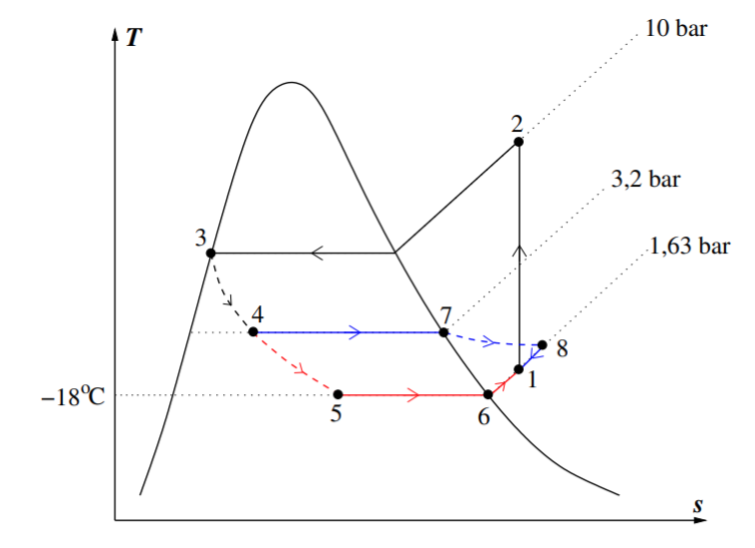